In [64]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier  
from sklearn import tree
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
%matplotlib inline

# <span style="color:orange;"> Read Data </span>

In [65]:
data=pd.read_csv("/kaggle/input/iris-flower-dataset/IRIS.csv")

# <span style="color:orange;">Data Analysis</span>

In [66]:
data.head(5)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [67]:

data.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [68]:

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [69]:
data.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


# <span style="color:orange;"> Histogram </span>

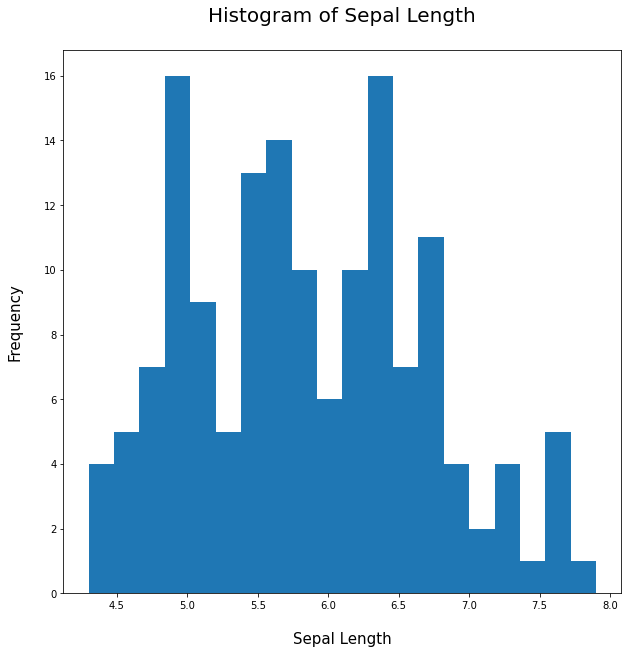

In [70]:
plt.figure(figsize=(10,10))
plt.hist(x = data['sepal_length'], bins = 20)
plt.xlabel("\nSepal Length",fontsize=15,color="black")
plt.ylabel("Frequency\n",fontsize=15,color="black")
plt.title("Histogram of Sepal Length\n",fontsize=20,color="black")
plt.show()


# <span style="color:orange;"> Data Analysis Using Histogram </span>

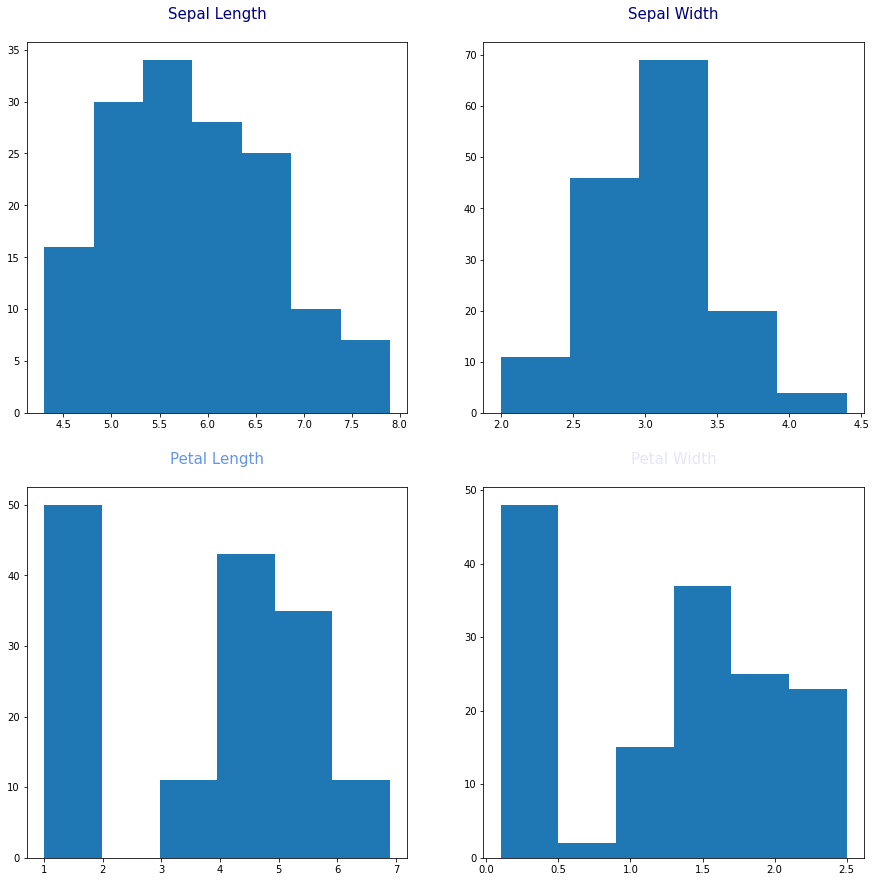

In [71]:
fig, axes = plt.subplots(2, 2, figsize=(15,15))
 
axes[0,0].set_title("Sepal Length\n",fontsize=15,color="navy")
axes[0,0].hist(data['sepal_length'], bins=7)
 
axes[0,1].set_title("Sepal Width\n",fontsize=15,color="navy")
axes[0,1].hist(data['sepal_width'], bins=5);
 
axes[1,0].set_title("Petal Length\n",color="cornflowerblue",fontsize=15)
axes[1,0].hist(data['petal_length'], bins=6);
 
axes[1,1].set_title("Petal Width\n",fontsize=15,color="lavender")
axes[1,1].hist(data['petal_width'], bins=6);

# <span style="color:orange;"> Histplot </span>

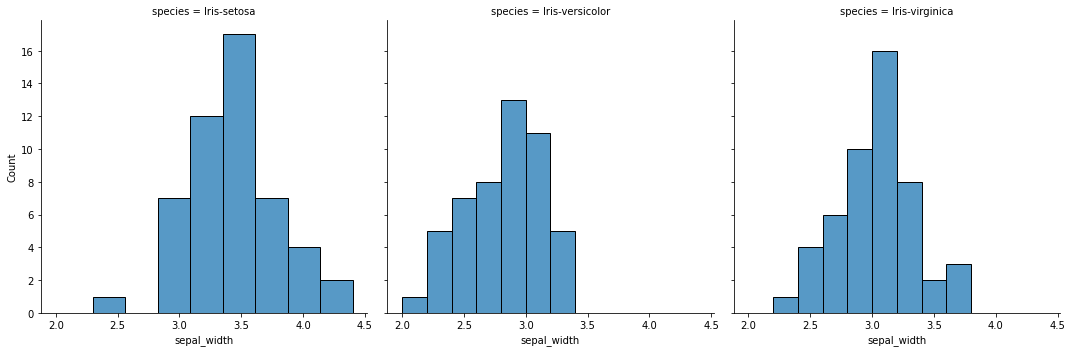

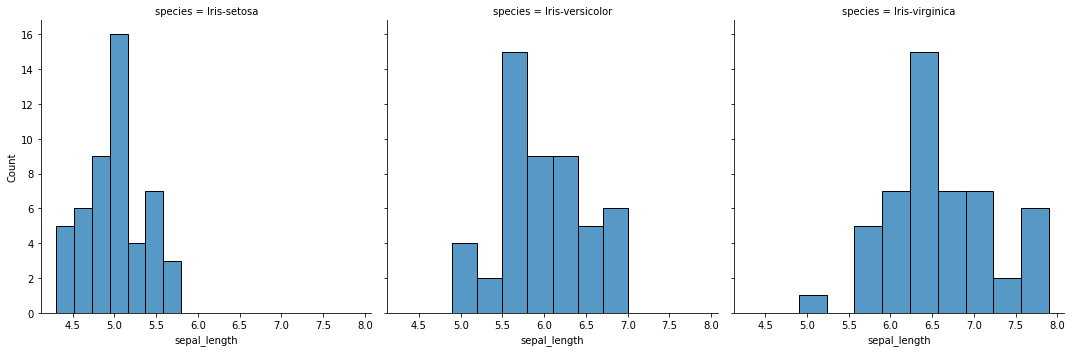

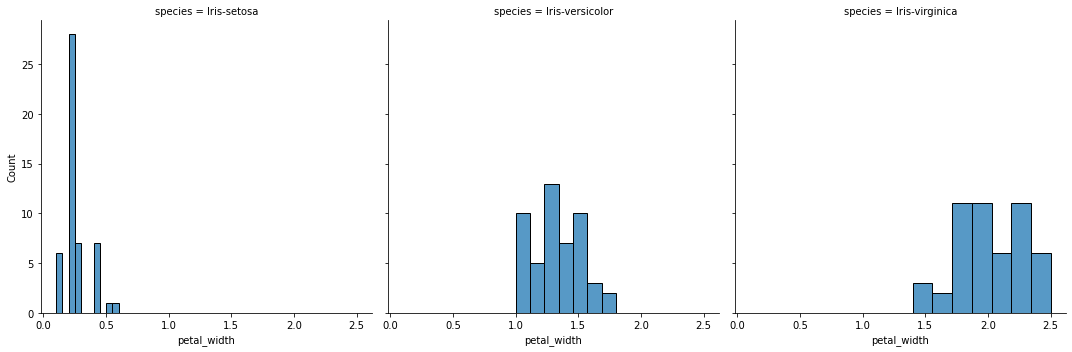

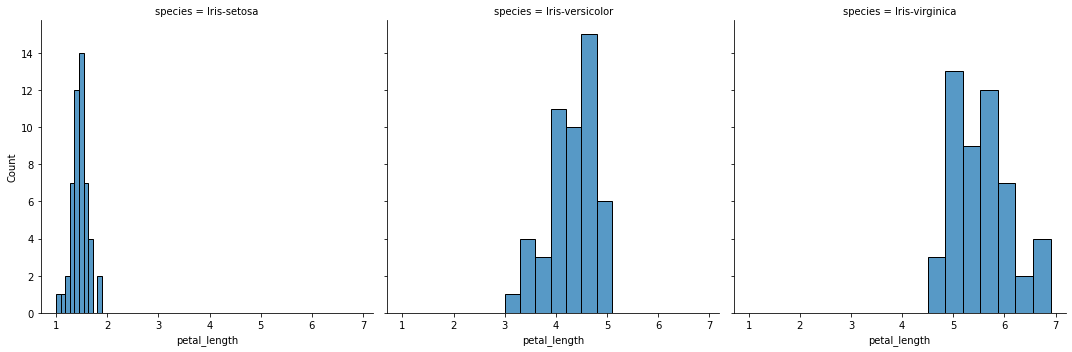

In [72]:
g = sns.FacetGrid(data, col="species", height=5, col_wrap=3)
g.map(sns.histplot, "sepal_width")
g = sns.FacetGrid(data, col="species", height=5, col_wrap=3)
g.map(sns.histplot, "sepal_length")
g = sns.FacetGrid(data, col="species", height=5, col_wrap=3)
g.map(sns.histplot, "petal_width")
g = sns.FacetGrid(data, col="species", height=5, col_wrap=3)
g.map(sns.histplot, "petal_length")
plt.show()

# <span style="color:orange;"> Scatter Plot Sepal Length Vs Sepal Width </span>

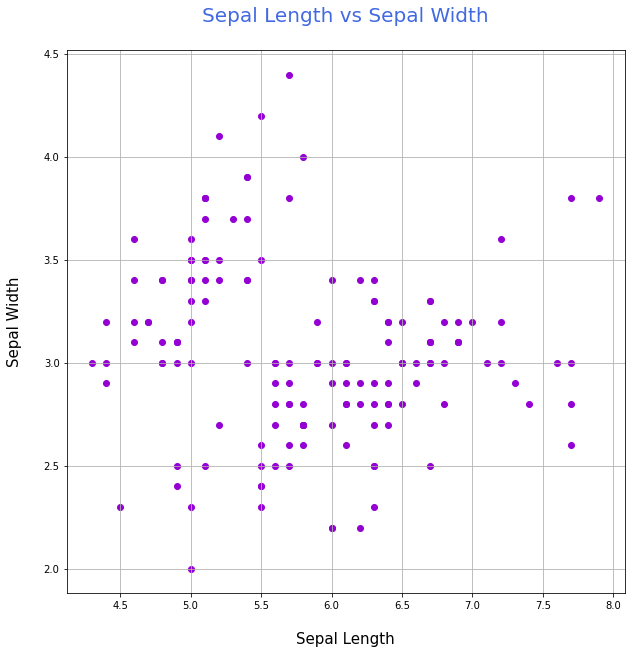

In [73]:
plt.figure(figsize=(10,10))
plt.scatter(x=data['sepal_length'], y=data['sepal_width'],color="darkviolet")
plt.xlabel("\nSepal Length",fontsize=15,color="black")
plt.ylabel("Sepal Width\n ",fontsize=15,color="black")
plt.title("Sepal Length vs Sepal Width\n",fontsize=20,color="royalblue")
plt.grid(True)
plt.show()

# <span style="color:orange;"> Scatter Plot Petal Length Vs Petal Width </span>

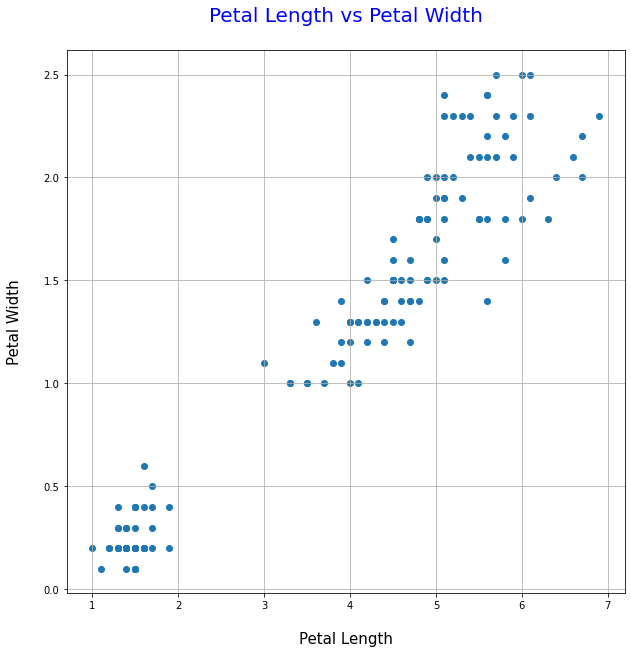

In [74]:
plt.figure(figsize=(10,10))
plt.scatter(x=data['petal_length'], y=data['petal_width'])
plt.xlabel("\nPetal Length",fontsize=15,color="black")
plt.ylabel("Petal Width\n ",fontsize=15,color="black")
plt.title("Petal Length vs Petal Width\n",fontsize=20,color="blue")
plt.grid(True)
plt.show()

# <span style="color:orange;"> PairPlot </span>

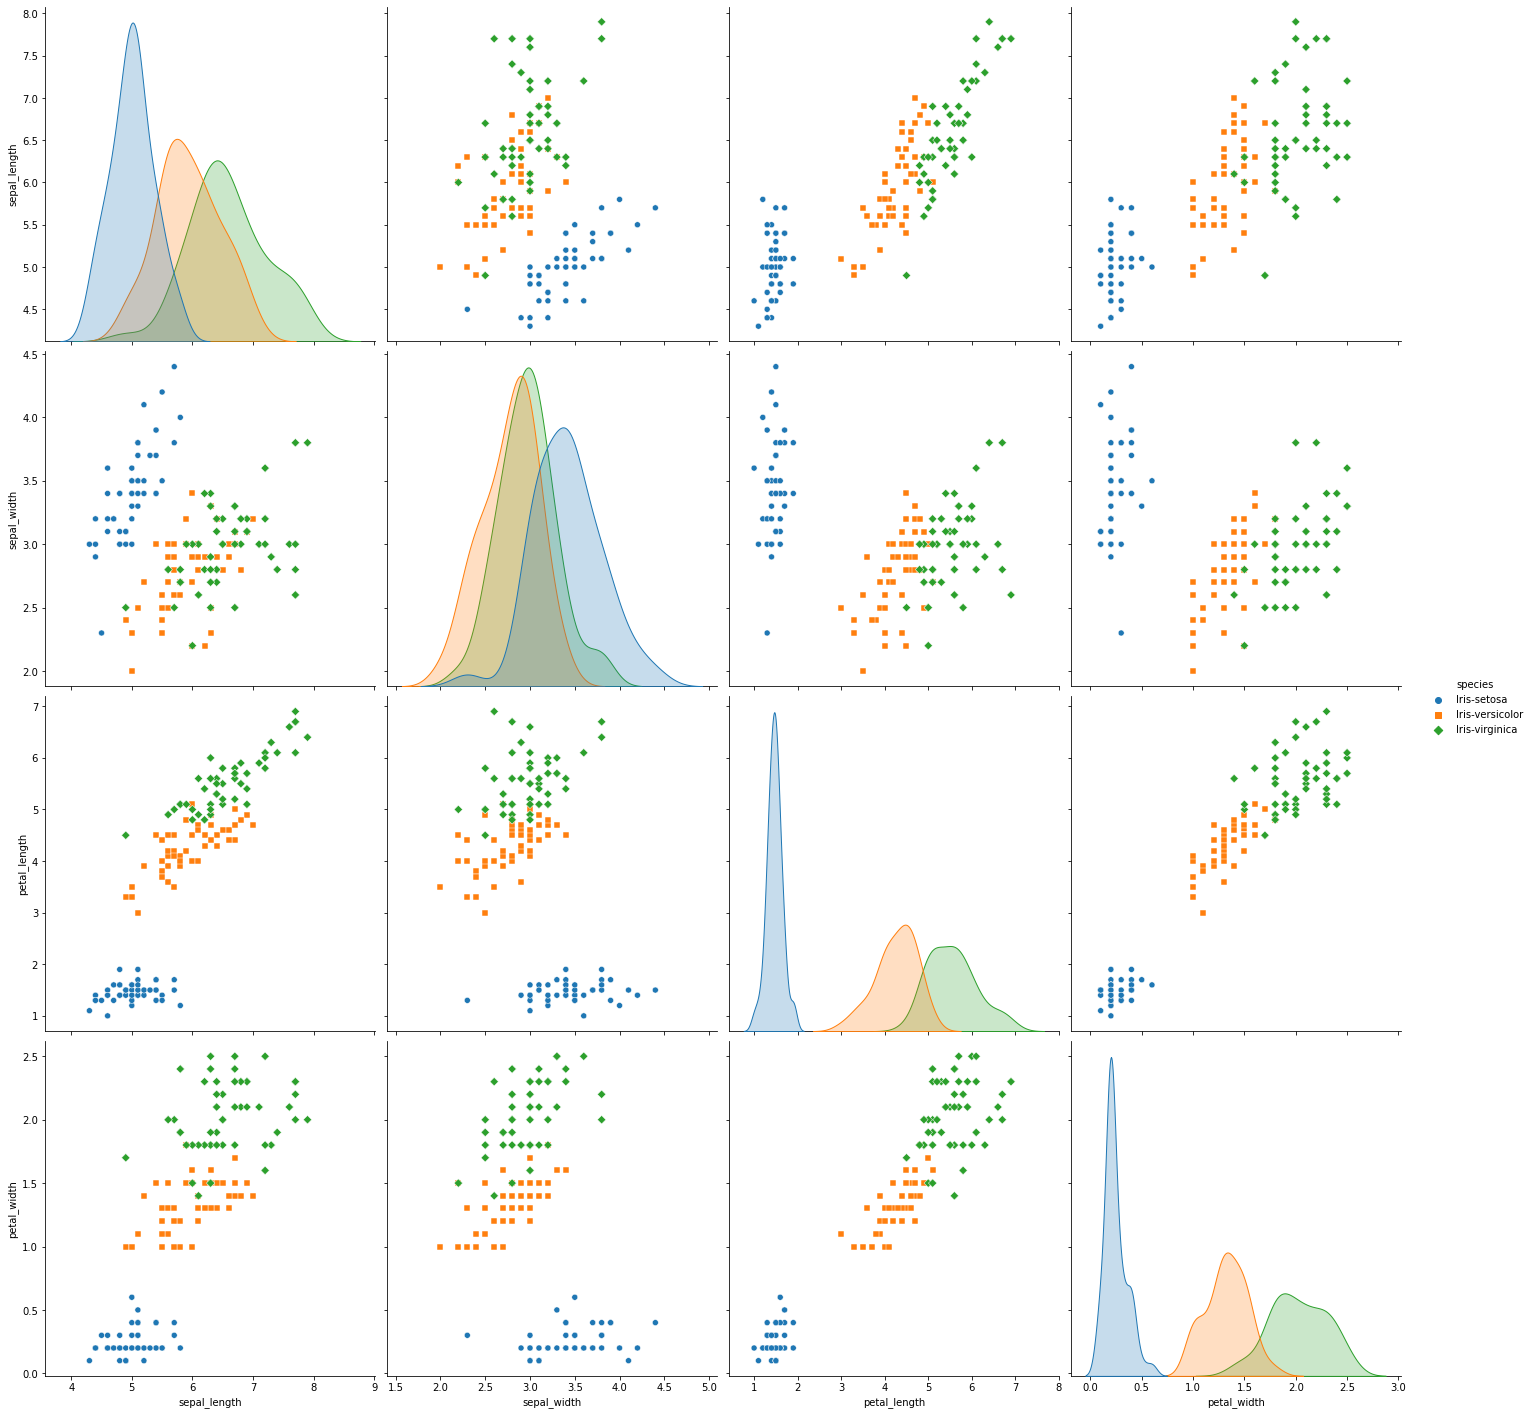

In [75]:

sns.pairplot(data=data, hue='species',markers=["o", "s", "D"],height=5,corner=False)

plt.show()

# <span style="color:orange;"> Pie Chart</span>

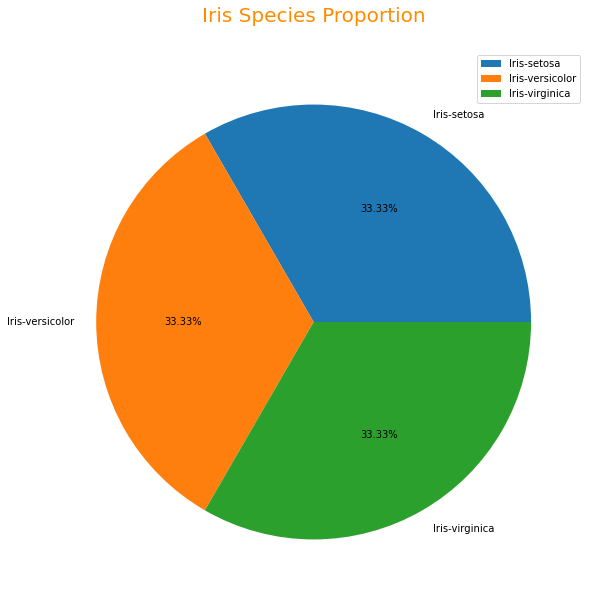

In [76]:
plt.figure(figsize=(10,10))
plt.pie(x=data['species'].value_counts(),labels=data['species'].value_counts().index, autopct='%0.2f%%')
plt.title("Iris Species Proportion\n",fontsize=20,color="darkorange")
plt.legend(loc="best")
plt.show()


# <span style="color:orange;"> CountPlot </span>

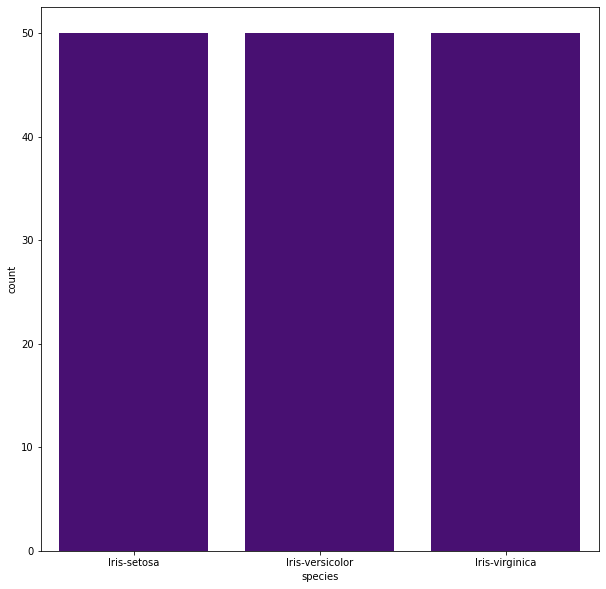

In [77]:
plt.figure(figsize=(10,10))
sns.countplot(x=data['species'],color='indigo')
plt.show()

# <span style="color:orange;"> Bar Plot </span>

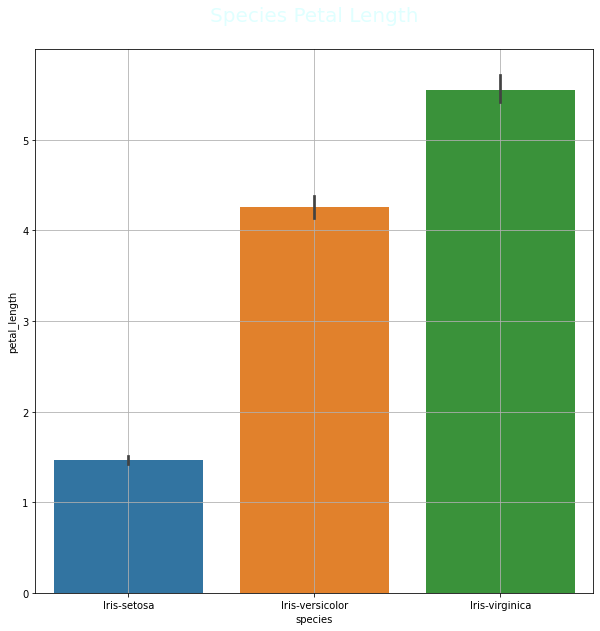

In [78]:
plt.figure(figsize=(10,10))
sns.barplot(x=data['species'],y=data['petal_length'])
plt.title("Species Petal Length\n",color="lightcyan",fontsize=20)
plt.grid(True)
plt.show()


# <span style="color:orange;"> Barh</span>

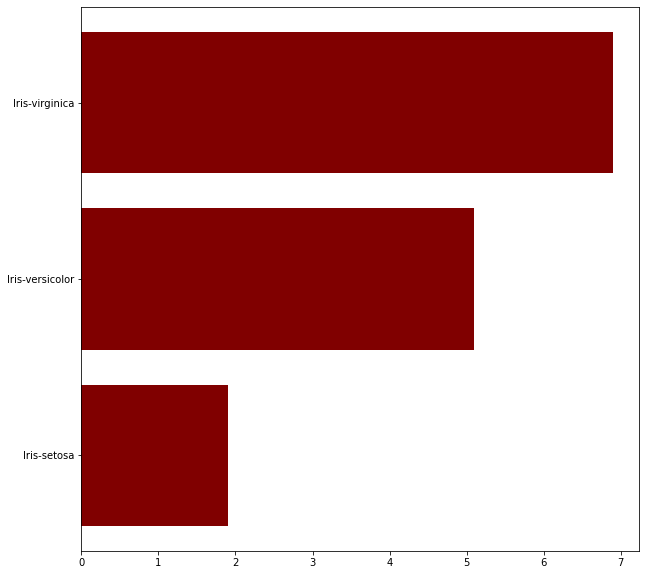

In [79]:
plt.figure(figsize=(10,10))
plt.barh(y=data['species'], width=data['petal_length'],color='maroon')

plt.show()

# <span style="color:orange;"> Barh Sepal Length</span>

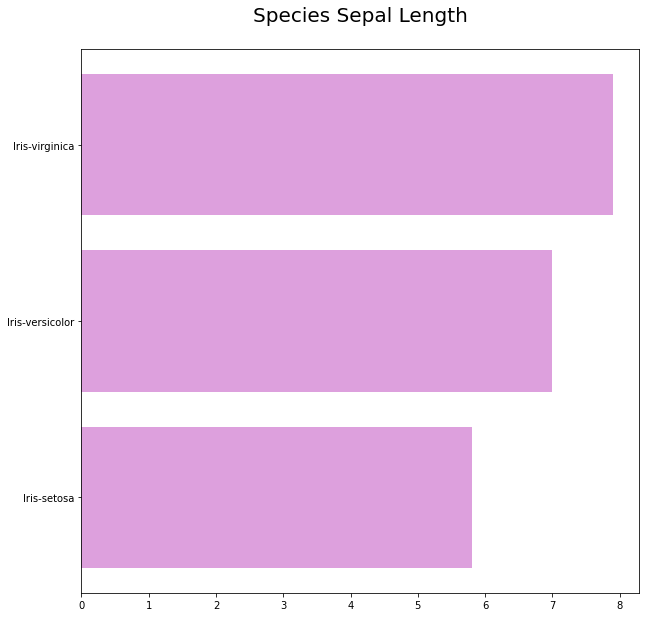

In [80]:
plt.figure(figsize=(10,10))
plt.barh(y=data['species'], width=data['sepal_length'],color='plum')
plt.title("Species Sepal Length\n",color="black",fontsize=20)

plt.show()

# <span style="color:orange;">BoxPlot Sepal Length </span>

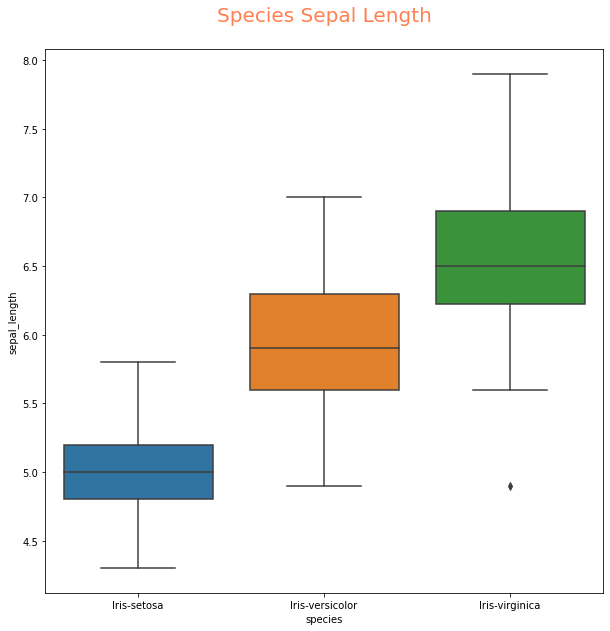

In [81]:
plt.figure(figsize=(10,10))
sns.boxplot(x=data["species"],y=data['sepal_length'])
plt.title("Species Sepal Length\n",fontsize=20,color="coral")
plt.show()

# <span style="color:orange;"> BoxPlot </span>

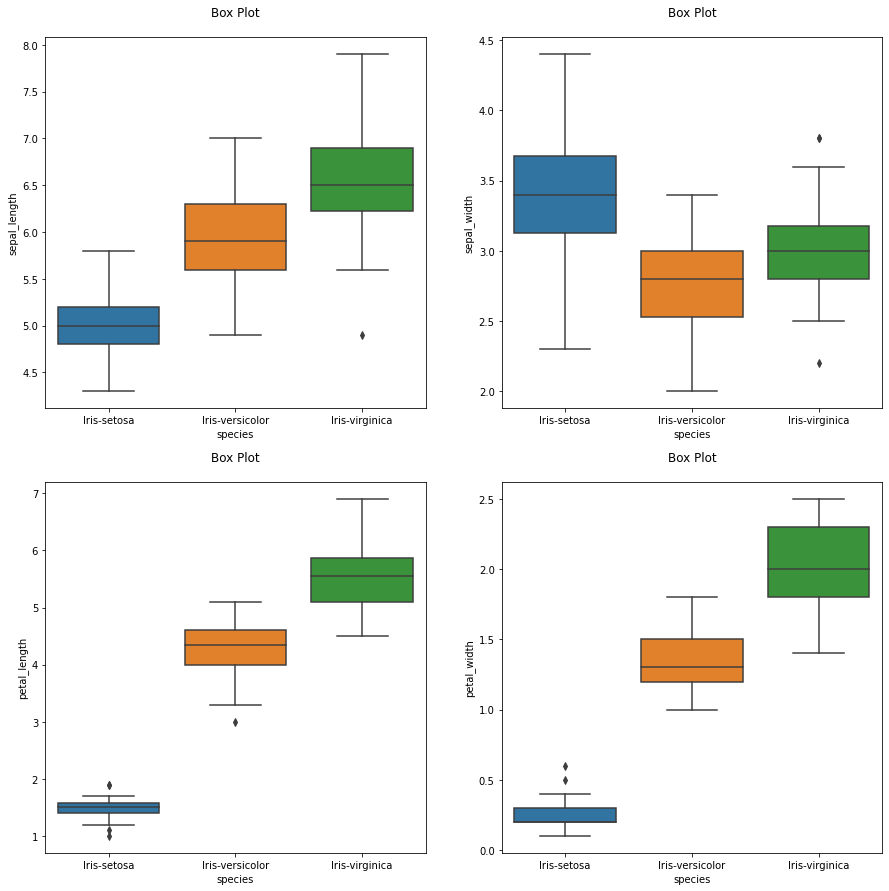

In [82]:
def graph(y):
    sns.boxplot(x="species", y=y, data=data).set(title="Box Plot\n")



plt.figure(figsize=(15,15))


     

plt.subplot(221)
graph('sepal_length')
 
plt.subplot(222)
graph('sepal_width')
 
plt.subplot(223)
graph('petal_length')
 
plt.subplot(224)
graph('petal_width')
 
plt.show()

# <span style="color:orange;"> LinePlot Sepal Length Vs Sepal Width </span>

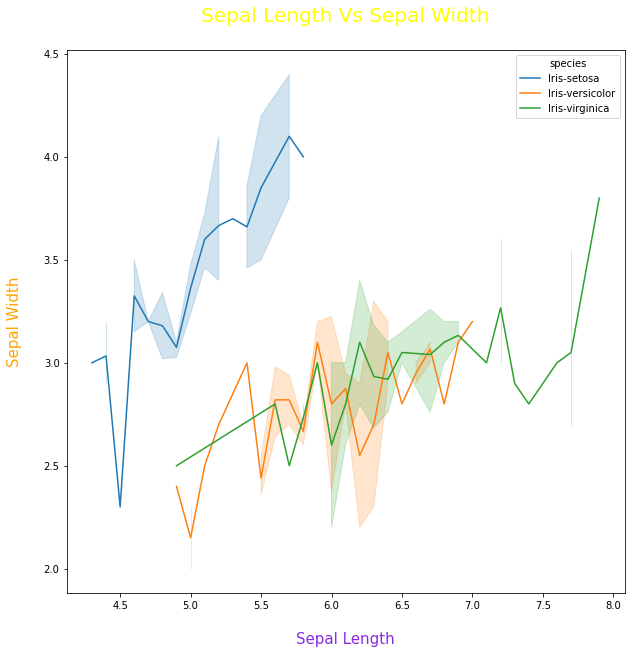

In [83]:
plt.figure(figsize=(10,10))
sns.lineplot(x="sepal_length", y="sepal_width", data=data,hue="species")
plt.title("Sepal Length Vs Sepal Width\n",fontsize=20,color="yellow")
plt.xlabel("\nSepal Length",fontsize=15,color="blueviolet")
plt.ylabel("Sepal Width\n",color="orange",fontsize=15)
plt.show()

# <span style="color:orange;"> LinePlot Petal Length Vs Petal Width </span>

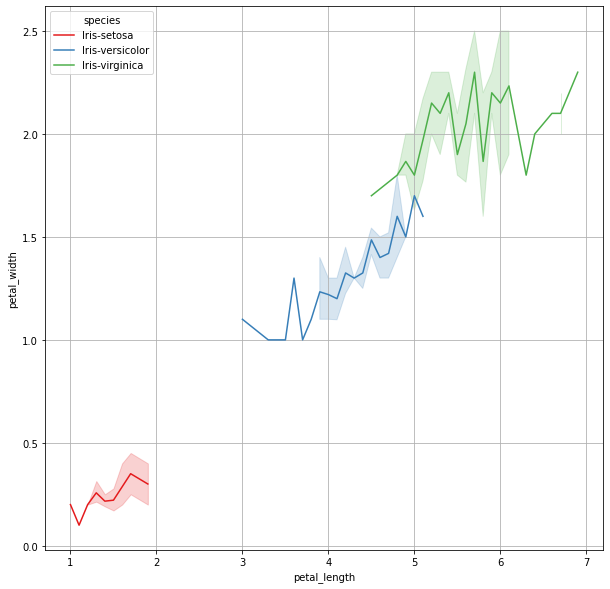

In [84]:
plt.figure(figsize=(10,10))
sns.lineplot(x = "petal_length", y = "petal_width",hue = "species",data = data,palette = "Set1")
plt.grid(True)
plt.show()

# <span style="color:orange;"> ViolinPlot </span>

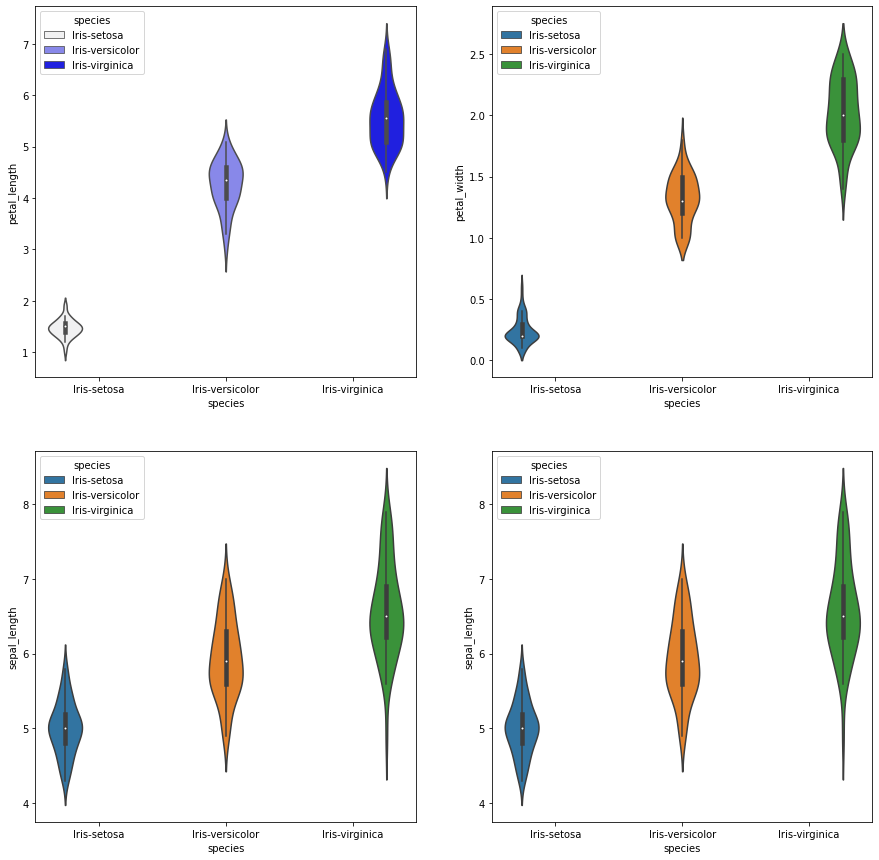

In [85]:

fig, axes = plt.subplots(2, 2, figsize=(15,15))

sns.violinplot(data=data, x="species", y="petal_length", hue="species",ax=axes[0,0],color="blue")
sns.violinplot(data=data, x="species", y="petal_width", hue="species",ax=axes[0,1])
sns.violinplot(data=data, x="species", y="sepal_length", hue="species",ax=axes[1,0])
sns.violinplot(data=data, x="species", y="sepal_length", hue="species",ax=axes[1,1])

plt.show()

# <span style="color:orange;"> Correlation Matrix </span>

In [86]:
cor_matrix=data.corr()

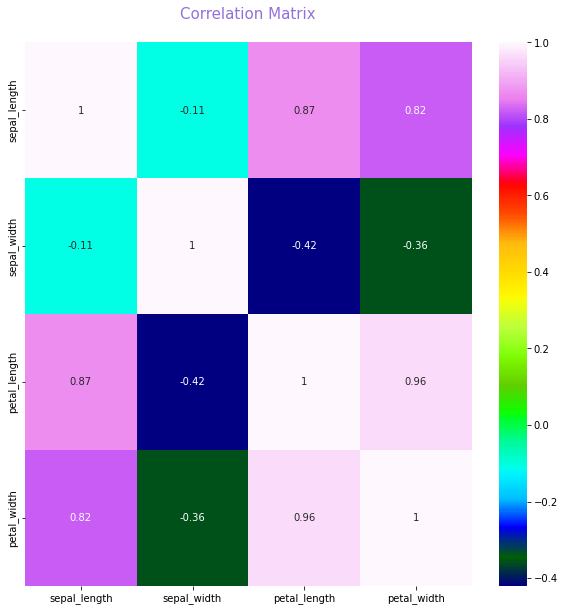

In [87]:
plt.figure(figsize=(10,10))
sns.heatmap(cor_matrix, cmap="gist_ncar",annot=True)
plt.title("Correlation Matrix\n",fontsize=15,color="mediumpurple")
plt.show()

In [88]:
data.head(5)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa




# <span style="color:steelblue;"> Five Models Are Used  For Train && Test Data </span>

# <span style="color:orange;">1.Support Vector Classifier</span>

# <span style="color:chocolate;">2.Logistic Regression</span>

# <span style="color:brown;">3.KNN Classifier </span>

# <span style="color:yellow;">4.Decision Tree</span>

# <span style="color:darkorchid;">5.Linear Discriminant Analysis</span>



In [89]:
final_data=data.values

# <span style="color:orange;"> Separate Feature </span>

In [90]:
X=final_data[: ,0 : 4]

# <span style="color:orange;"> Separate Label </span>

In [91]:
Y=final_data[:, 4]

# <span style="color:orange;"> Split Train and Test Data </span>

In [92]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.8,random_state=42)

# <span style="color:orange;"> Support Vector Classifier Model </span>

In [93]:
svc_model=SVC()

In [94]:
svc_model.fit(X_train,Y_train)

SVC()

# <span style="color:orange;"> SVC Accuracy Score </span>

In [95]:
prediction = svc_model.predict(X_test)
accuracy_score(Y_test, prediction)

0.9333333333333333

# <span style="color:orange;"> SVC Confusion Matrix </span>

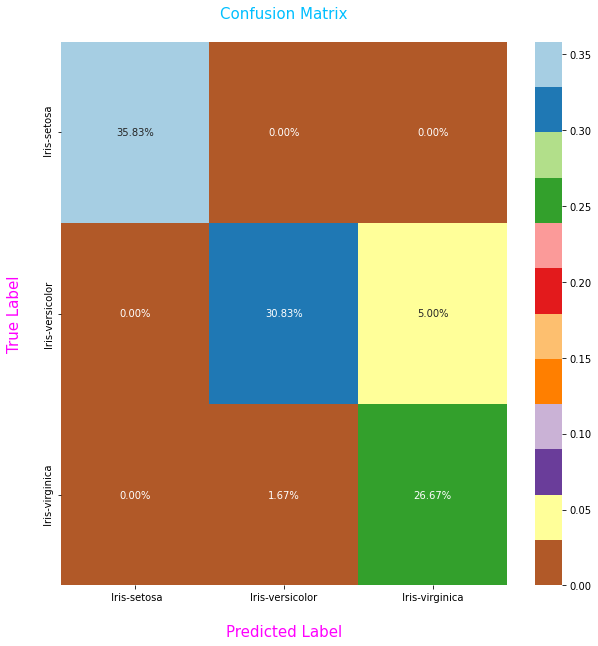

In [96]:
plt.figure(figsize=(10,10))
label_name=[" Iris-setosa","Iris-versicolor"," Iris-virginica "]
cf_matrix=confusion_matrix(prediction,Y_test)
sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, fmt='.2%', cmap="Paired_r",xticklabels=label_name,yticklabels=label_name)
plt.title("Confusion Matrix\n",color="deepskyblue",fontsize=15)
plt.ylabel("True Label\n",fontsize=15,color="magenta")
plt.xlabel("\nPredicted Label",fontsize=15,color="magenta")
plt.show()

# <span style="color:orange;"> SVC Classification Report </span>

In [97]:
print(classification_report(Y_test, prediction))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        43
Iris-versicolor       0.86      0.95      0.90        39
 Iris-virginica       0.94      0.84      0.89        38

       accuracy                           0.93       120
      macro avg       0.93      0.93      0.93       120
   weighted avg       0.94      0.93      0.93       120



# <span style="color:orange;"> SVC Data Prediction </span>

In [98]:
predict_new_data = np.array([[5.1,3.5,1.4,0.2], [  4.9, 2.2, 2.55, 1.1 ], [  5.3, 2.5, 4.6, 1.9 ]])

new_prediction = svc_model.predict(predict_new_data)
print("Prediction of Species : {}".format(new_prediction))

Prediction of Species : ['Iris-setosa' 'Iris-versicolor' 'Iris-versicolor']


# <span style="color:orange;"> Logistic Regression Model </span>

In [99]:
logistic_regression_model=LogisticRegression()

In [100]:
logistic_regression_model.fit(X_train,Y_train)

LogisticRegression()

In [101]:
y_pred=logistic_regression_model.predict(X_test)

# <span style="color:orange;"> LR Accuracy Score </span>

In [102]:
accuracy_score(Y_test, y_pred)

0.9666666666666667

# <span style="color:orange;"> LR Confusion Matrix</span>

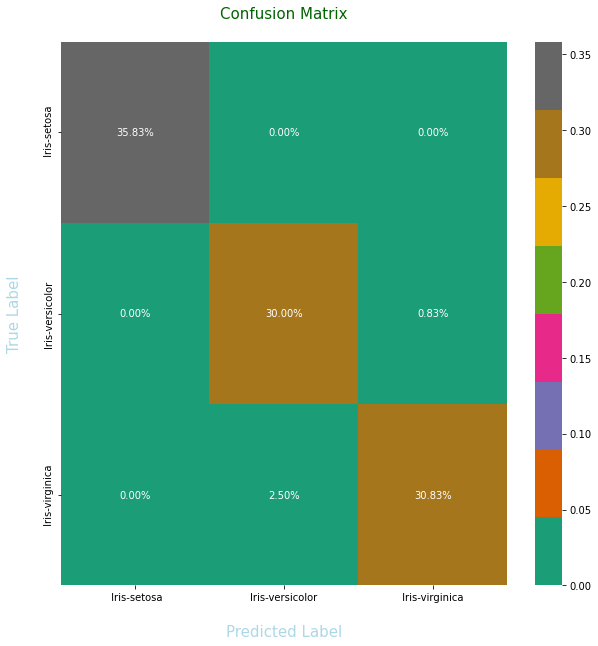

In [103]:
plt.figure(figsize=(10,10))
label_name=[" Iris-setosa","Iris-versicolor"," Iris-virginica "]
cf_matrix=confusion_matrix(y_pred,Y_test)
sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, fmt='.2%', cmap="Dark2",xticklabels=label_name,yticklabels=label_name)
plt.title("Confusion Matrix\n",color="darkgreen",fontsize=15)
plt.ylabel("True Label\n",fontsize=15,color="lightblue")
plt.xlabel("\nPredicted Label",fontsize=15,color="lightblue")
plt.show()

# <span style="color:orange;"> LR Classification Report </span>

In [104]:
print(classification_report(Y_test, y_pred))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        43
Iris-versicolor       0.97      0.92      0.95        39
 Iris-virginica       0.93      0.97      0.95        38

       accuracy                           0.97       120
      macro avg       0.97      0.97      0.97       120
   weighted avg       0.97      0.97      0.97       120



# <span style="color:orange;"> LR Prediction </span>

In [105]:
predict_new_data = np.array([[5.1,3.5,1.4,0.2], [  4.9, 2.2, 2.55, 1.1 ], [  5.3, 2.5, 4.6, 1.9 ]])

new_prediction = logistic_regression_model.predict(predict_new_data)
print("Prediction of Species : {}".format(new_prediction))

Prediction of Species : ['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']


# <span style="color:orange;"> Decision Tree Model </span>

In [106]:
decision_tree_model = tree.DecisionTreeClassifier()

In [107]:
decision_tree_model.fit(X_train,Y_train)

DecisionTreeClassifier()

In [108]:
decision_tree_predict=decision_tree_model.predict(X_test)

# <span style="color:orange;"> DT Accuracy Score </span>

In [109]:
accuracy_score(Y_test,decision_tree_predict)

0.9333333333333333

# <span style="color:orange;"> DT Confusion Matrix </span>

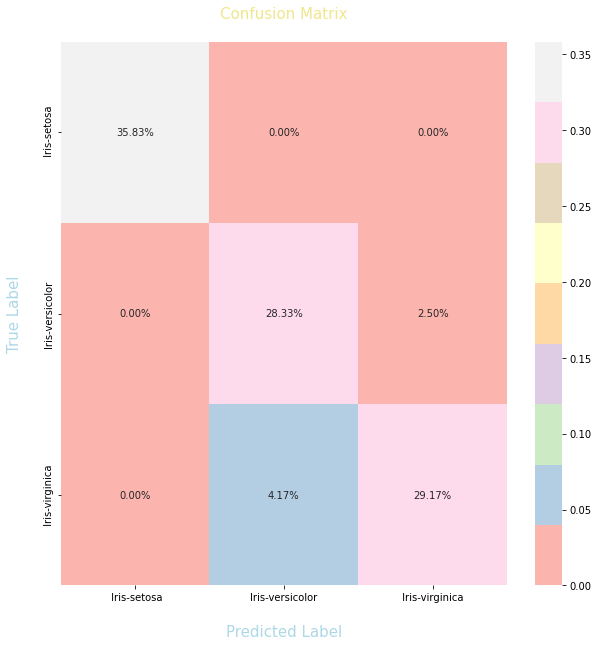

In [110]:
plt.figure(figsize=(10,10))
label_name=[" Iris-setosa","Iris-versicolor"," Iris-virginica "]
cf_matrix=confusion_matrix(decision_tree_predict,Y_test)
sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, fmt='.2%', cmap="Pastel1",xticklabels=label_name,yticklabels=label_name)
plt.title("Confusion Matrix\n",color="khaki",fontsize=15)
plt.ylabel("True Label\n",fontsize=15,color="lightblue")
plt.xlabel("\nPredicted Label",fontsize=15,color="lightblue")

plt.show()

# <span style="color:orange;"> DT Classification Report </span>

In [111]:
print(classification_report(Y_test, decision_tree_predict))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        43
Iris-versicolor       0.92      0.87      0.89        39
 Iris-virginica       0.88      0.92      0.90        38

       accuracy                           0.93       120
      macro avg       0.93      0.93      0.93       120
   weighted avg       0.93      0.93      0.93       120



# <span style="color:orange;"> DT Model Prediction </span>

In [112]:
predict_new_data = np.array([[5.1,3.5,1.4,0.2], [  4.9, 2.2, 2.55, 1.1 ], [  5.3, 2.5, 4.6, 1.9 ]])

new_prediction = decision_tree_model.predict(predict_new_data)
print("Prediction of Species : {}".format(new_prediction))

Prediction of Species : ['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']


# <span style="color:orange;"> KNN Classifier </span>

In [113]:
knn_model= KNeighborsClassifier()  

In [114]:
knn_model.fit(X_train,Y_train)

KNeighborsClassifier()

In [115]:
knn_predict=knn_model.predict(X_test)

# <span style="color:orange;"> KNN Accuracy Score </span>

In [116]:
accuracy_score(Y_test,knn_predict)

0.9666666666666667

# <span style="color:orange;"> KNN Confusion Matrix </span>

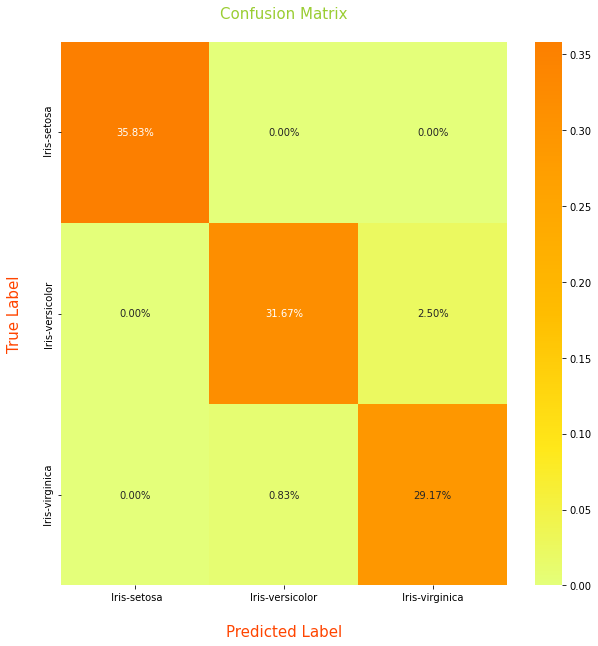

In [117]:
plt.figure(figsize=(10,10))
label_name=[" Iris-setosa","Iris-versicolor"," Iris-virginica "]
cf_matrix=confusion_matrix(knn_predict,Y_test)
sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, fmt='.2%', cmap="Wistia",xticklabels=label_name,yticklabels=label_name)
plt.title("Confusion Matrix\n",color="yellowgreen",fontsize=15)
plt.ylabel("True Label\n",fontsize=15,color="orangered")
plt.xlabel("\nPredicted Label",fontsize=15,color="orangered")

plt.show()

# <span style="color:orange;"> KNN Classification Report </span>

In [118]:
print(classification_report(knn_predict,Y_test))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        43
Iris-versicolor       0.97      0.93      0.95        41
 Iris-virginica       0.92      0.97      0.95        36

       accuracy                           0.97       120
      macro avg       0.97      0.97      0.97       120
   weighted avg       0.97      0.97      0.97       120



# <span style="color:orange;"> KNN Model Prediction </span>

In [119]:
predict_new_data = np.array([[5.1,3.5,1.4,0.2], [  4.9, 2.2, 2.55, 1.1 ], [  5.3, 2.5, 4.6, 1.9 ]])

new_prediction = knn_model.predict(predict_new_data)
print("Prediction of Species : {}".format(new_prediction))

Prediction of Species : ['Iris-setosa' 'Iris-setosa' 'Iris-virginica']


# <span style="color:orange;"> Linear Discriminant Analysis Model </span>

In [120]:
lda_model=LinearDiscriminantAnalysis()

In [121]:
lda_model.fit(X_train,Y_train)

LinearDiscriminantAnalysis()

In [122]:
lda_predict=lda_model.predict(X_test)

# <span style="color:orange;"> LDA Accuracy Score </span>

In [123]:
accuracy_score(lda_predict,Y_test)

0.975

# <span style="color:orange;"> LDA Confusion Matrix </span>

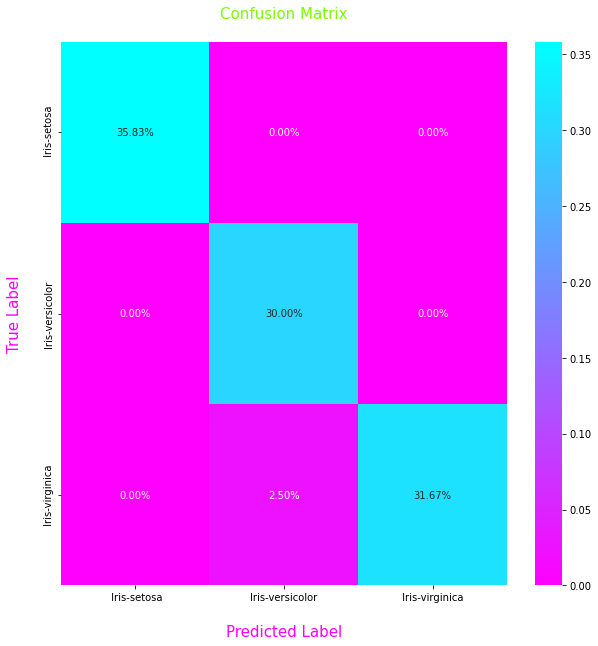

In [124]:
plt.figure(figsize=(10,10))
label_name=[" Iris-setosa","Iris-versicolor"," Iris-virginica "]
cf_matrix=confusion_matrix(lda_predict,Y_test)
sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, fmt='.2%', cmap="cool_r",xticklabels=label_name,yticklabels=label_name)
plt.title("Confusion Matrix\n",color="lawngreen",fontsize=15)
plt.ylabel("True Label\n",fontsize=15,color="fuchsia")
plt.xlabel("\nPredicted Label",fontsize=15,color="fuchsia")

plt.show()

# <span style="color:orange;"> LDA Classification Report </span>

In [125]:
print(classification_report(lda_predict,Y_test))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        43
Iris-versicolor       0.92      1.00      0.96        36
 Iris-virginica       1.00      0.93      0.96        41

       accuracy                           0.97       120
      macro avg       0.97      0.98      0.97       120
   weighted avg       0.98      0.97      0.98       120



#   <span style="color:orange;"> LDA Data Prediction </span>

In [126]:
predict_new_data = np.array([[5.1,3.5,1.4,0.2], [  4.9, 2.2, 2.55, 1.1 ], [  5.3, 2.5, 4.6, 1.9 ]])

new_prediction = lda_model.predict(predict_new_data)
print("Prediction of Species : {}".format(new_prediction))

Prediction of Species : ['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']
